In [20]:
import os
import sys
import numpy as np
from importlib import reload  
import support as sup
reload(sup)
sys.path.insert(0, '../icenumerics')

import icenumerics as ice

from icenumerics.geometry import ordering 
import magcolloids as mgc

import matplotlib.pyplot as plt
ureg = ice.ureg

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Looking for the Ground State 

    In this script, we will fix the initial colloidal configuration in order to check if it is the GS.

In [21]:
output = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-7.0"

    Whit the following function defined in the support.py file I build the initial condition. Then I added this function in the cairo_spin_ice_geometry() in order to have this configuration when I choose the border = "GS?" in the create_lattice() function. Maybe is not the cleanest way to do it, since is a configuration istead of a border but is the most straight forward way to do it. 

In [22]:
centers, directions = sup.unit_cell_Cairo_GS(1)

/home/carolina/CairoLattice_ACI_PROJECT/Scripts/support.py:161: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  new[:,0] = centers_toAddX
/home/carolina/CairoLattice_ACI_PROJECT/Scripts/support.py:162: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  new[:,1] = centers_toAddY


(-1.2613543953046409, 5.951348865790706, -3.51646810936328, 3.6962351517320675)

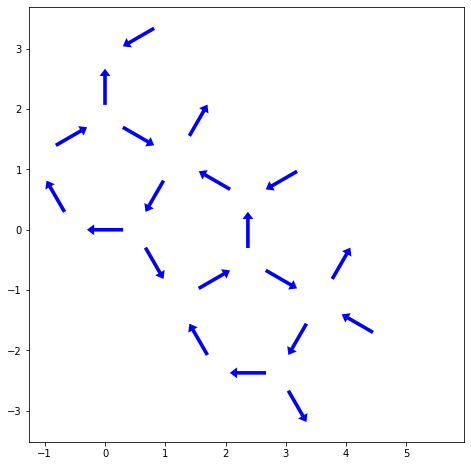

In [23]:
sp = ice.spins(centers = centers, directions = directions)

f, (ax1) = plt.subplots(1,1,figsize = (8,8))
sp.display(ax1)

plt.axis('square')

In [24]:
np.random.seed()

l = 5

sp = sup.spins()
ureg = ice.ureg
sp.create_lattice(geometry = "cairo",size =[l,l],lattice_constant=19.5458*ureg.um, border="GS?")
#sp.order_spins(ordering.random_ordering) # Add this line to start from a random ordering

/home/carolina/CairoLattice_ACI_PROJECT/Scripts/support.py:161: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  new[:,0] = centers_toAddX
/home/carolina/CairoLattice_ACI_PROJECT/Scripts/support.py:162: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  new[:,1] = centers_toAddY
/home/carolina/CairoLattice_ACI_PROJECT/Scripts/support.py:212: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  new_centers[:,1] = centersY


In [25]:
particle = ice.particle(radius = 5*ureg.um,
             susceptibility = 0.005,
             diffusion = 0.125*ureg.um**2/ureg.s,
             temperature = 300*ureg.K,
             density = 1000*ureg.kg/ureg.m**3)

trap_long = ice.trap(trap_sep = 10*ureg.um,
               height = 25*ureg.pN*ureg.nm,
               stiffness = 0.1*ureg.fN/ureg.nm)

trap_short = ice.trap(trap_sep = 4.5258*ureg.um,
               height = 25*ureg.pN*ureg.nm,
               stiffness = 0.1*ureg.fN/ureg.nm)

traps = []

In [26]:
for s in sp:
    
    if ( s.direction[0].magnitude == 1.0 or s.direction[0].magnitude == -1.0 or 
        s.direction[1].magnitude == 1.0 or s.direction[1].magnitude == -1.0 ):
        
        traps.append(trap_short)
        
    else:
        
        traps.append(trap_long)

In [27]:
col = ice.colloidal_ice(sp, particle, traps, height_spread = 0, susceptibility_spread = 0.1)

col.pad_region(40*ureg.um) 

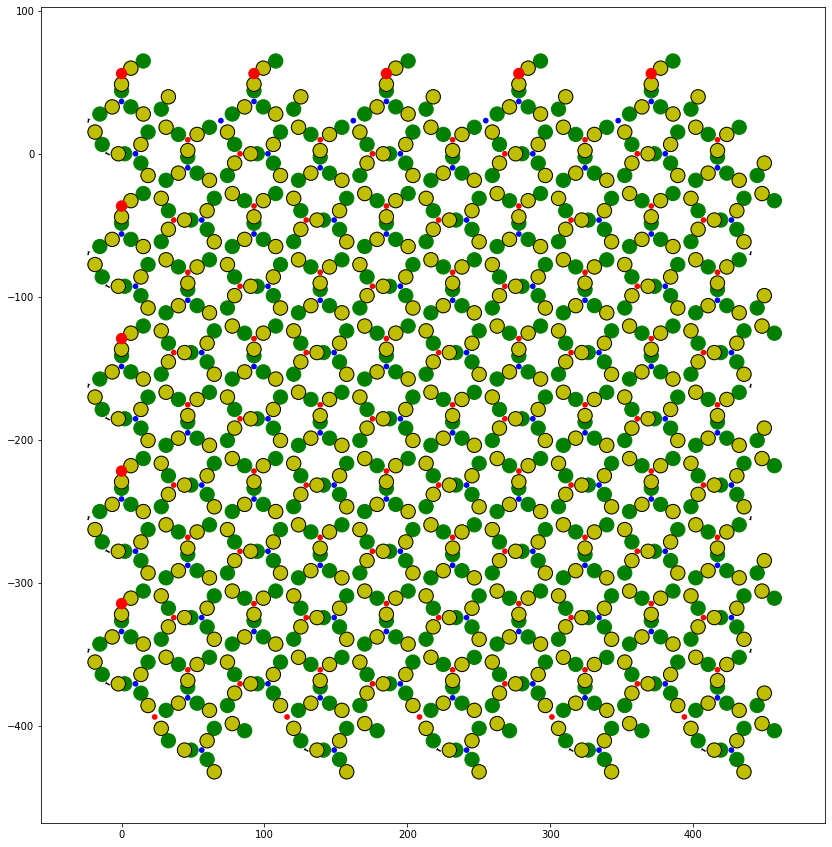

In [28]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))
v = ice.vertices()
v = v.colloids_to_vertices(col)

col.display(ax1)
v.display(ax1)

In [29]:
world = ice.world(
    field = 25*ureg.mT,
    temperature = 300*ureg.K,
    dipole_cutoff = 200*ureg.um)

In [30]:
%%time
total_time = 1000*ureg.s
col.simulate(world,
             name = "TryingGS",
             include_timestamp = False,
             targetdir = output,
             framerate = 1*ureg.Hz,
             timestep = 10*ureg.ms,
             run_time = total_time,
             output = ["x","y","z","mux","muy","muz"])

scanning file


CPU times: user 8.99 s, sys: 156 ms, total: 9.15 s
Wall time: 3min 2s


In [31]:
#col.sim.field.fieldz = "v_Bmag*time/%f"%total_time.to(ureg.us).magnitude
col.sim.field.fieldz = "v_Bmag"

col.run_simulation()

In [32]:
col.load_simulation(slice(0,None,1))

scanning file


In [33]:
col.trj

type           x           y    z      mux      muy       muz  \
frame id                                                                    
0     1        1   -2.262900    0.000000  0.0  0.00000  0.00000  0.000174   
      2        1  -18.546101   15.195700  0.0  0.00000  0.00000  0.000174   
      3        1   -6.535400   32.805901  0.0  0.00000  0.00000  0.000174   
      4        1   15.195700   27.805901  0.0  0.00000  0.00000  0.000174   
      5        1   13.546100    6.535400  0.0  0.00000  0.00000  0.000174   
...          ...         ...         ...  ...      ...      ...       ...   
1000  996      3  432.958008 -406.330994  0.0 -5.00000 -8.66025  0.000000   
      997      3  432.958008 -428.062012  0.0  5.00000 -8.66025  0.000000   
      998      3  452.398010 -401.149994  0.0 -8.66025  5.00000  0.000000   
      999      3  447.188995 -381.681000  0.0  5.00000  8.66025  0.000000   
      1000     3  427.777008 -354.798004  0.0 -8.66025 -5.00000  0.000000   

                 t  
frame id            
0     1        0.0  
      2        0.0  
      3        0.0  
      4        0.0  
      5        0.0  
...            ...  
1000  996   1000.0  
      997   1000.0  
      998   1000.0  
      999   1000.0  
      1000  1000.0  

[1001000 rows x 8 columns]

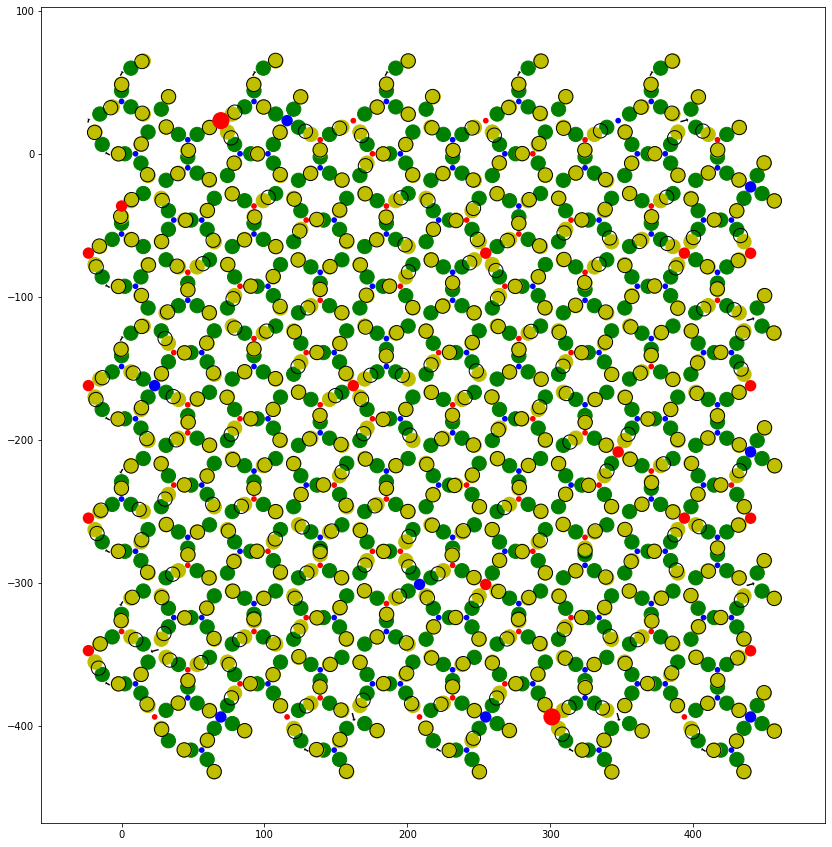

In [34]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))
v = ice.vertices()
col.set_state_from_frame(1000)
v = v.colloids_to_vertices(col)
col.display(ax1)
v.display(ax1)

In [ ]:

for i in range(0,1000,5):
    f, (ax1) = plt.subplots(1,1,figsize = (15,15))
    v = ice.vertices()
    col.set_state_from_frame(i)
    v = v.colloids_to_vertices(col)

    col.display(ax1)
    v.display(ax1)

    ax1.set_xticks([])
    ax1.set_yticks([])
    
    plt.savefig(os.path.join(output,"GS"+str(i)+".png"))
    plt.close()